# Scientific plots cheat sheet

#### Index:

 - [Required modules](#Required-modules)
 
 
 - Plot layout:
     - [Figure size and subplots](#Figure-size-and-subplots)
     - [Secondary axes](#Secondary-axes)
     - [Save with high quality](#Save-with-high-quality)
     
 
 - Plot content:
     - [Line style](#Line-style)
     - [Color sequences](#Color-sequences)
     - [Error bars](#Error-bars)
     - [Plots in superposition](#Plots-in-superposition)
 

 - Labels and text:
     - [LaTeX expressions](#LaTeX-expressions)
     - [Variable value as text (string formatting)](#Variable-value-as-text-(string-formatting))
     - [Axes ticks and labels](#Axes-ticks-and-labels)
 
 
 - [Final example](#Final-example)
 
 
 - Further tricks:
     - [Retrieve data from plots](#Retrieve-data-from-plots)

---

<br />
&nbsp;

### Required modules

In [1]:
# Main module for plots
import matplotlib.pyplot as plt

# For LaTeX expressions in plots
from matplotlib import rc
rc('text', usetex=True)

# To adjust tick frequency
import matplotlib.ticker as ticker

# For the notebook to save all figures in the .ipynb file
%matplotlib inline

# We will use numpy to compute a few examples
import numpy as np

---

<br />
&nbsp;


### Figure size and subplots


Figures that will be used in text documents (not slides) should be generated with a specific size. For example, each column in a two-column paper is around 9 cm wide. Hence, if we want to place a figure in one of the columns, a reasonable size would be $(x_\text{cm},y_\text{cm})=(8,5)$ cm.

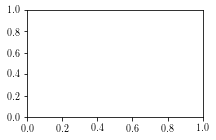

In [2]:
# Figure size in cm
x_cm = 8
y_cm = 5

# Create figure
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54)) 

# Show
plt.show()

<br />
&nbsp;

A single figure can contain $m\times n$ subplots. If $(m,n)\neq(1,1)$, `ax` is a list. To get the axis of subplot $(m,n)$, use `ax[m][n]`.

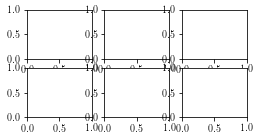

In [3]:
# Figure size in cm
x_cm = 10
y_cm = 5

# Number of subplots
m = 2 # rows
n = 3 # columns

# Create figure
fig, ax = plt.subplots(m, n, figsize=(x_cm/2.54, y_cm/2.54))

# Show
plt.show()

<br />
&nbsp;

For finer tuning of the subplots sizes, use [`GridSpec`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec):

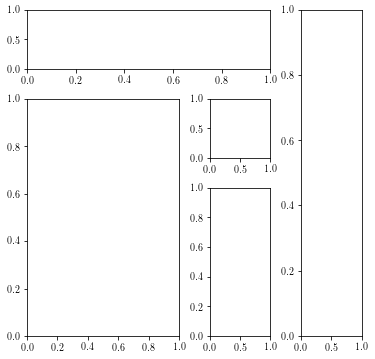

In [4]:
# Create figure
fig = plt.figure(figsize=(6, 6))

# Create subplots grid
grid = fig.add_gridspec(nrows=4, ncols=4, # Number of rows and columns
                        hspace=0.5, wspace=0.5) # Space between subplots

# Define each subplot
ax1 = fig.add_subplot(grid[0, :3])
ax2 = fig.add_subplot(grid[1:, :2])
ax3 = fig.add_subplot(grid[1, 2])
ax4 = fig.add_subplot(grid[2:, 2])
ax5 = fig.add_subplot(grid[:, 3])

---

<br />
&nbsp;

### Secondary axes

To create a secondary $y$-axis, use `.twinx()` to duplicate the primary axis and then specify the properties of the secondary axis.

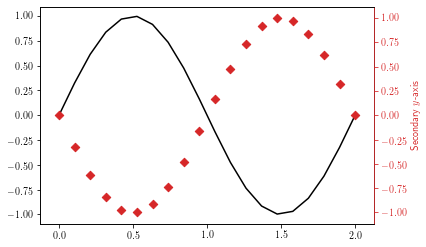

In [5]:
# Data
x = np.linspace(0,2,20)
y = np.sin(x*np.pi)

fig, ax1 = plt.subplots()

# Secondary axis
ax2 = ax1.twinx() # This command duplicates the axes

# Plot
ax1.plot(x, y, color='black')
ax2.scatter(x, -y, marker='D', color='tab:red')

# Secondary axis properties
ax2.set_ylabel(r'Secondary $y$-axis', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.spines['right'].set_color('tab:red')
ax2.tick_params(axis='y', which='both', colors='tab:red')

plt.show()

---

<br />
&nbsp;

### Save with high quality

In general, one should save the scientific figures in [vector format](https://en.wikipedia.org/wiki/Vector_graphics). Here we show to save them as a pdf file.

In [ ]:
# Data
x = np.linspace(0,2,20)
y = np.sin(x*np.pi)

# Create figure
x_cm = 8
y_cm = 5
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

# Plot
plt.plot(x,y)

# Save
filename = 'figs_directory/figname_x%d_y%d.pdf'%(x_cm,y_cm)
    # This will save the figure in the figs_directory/ folder.
    # To save it in the current folder, remove 'figs_directory/'
plt.savefig(filename, dpi=300, bbox_inches='tight')

One may want to save as png or jpeg instead of using a vector format when the amount of data in the plot is extremely large (e.g., a [surface plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) with an extremely fine grid). In those cases, png and jpeg files are generally much easier to handle due to its reduced size.

---

<br />
&nbsp;

### Line style

Here we give two examples to showcase the main line style properties.

Note that colors can be [specified in many ways](https://matplotlib.org/stable/tutorials/colors/colors.html), for example using a string from [this list of named colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html "See list of named colors").

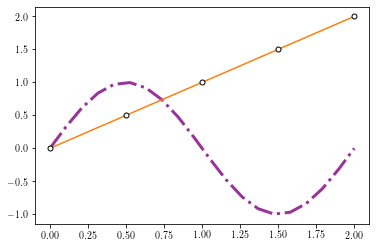

In [7]:
# Data
x = np.linspace(0,2,20)
x2 = np.linspace(0,2,5)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Example 1
plt.plot(x, y, 
         color=(0.5,0,0.5),
         linestyle='-.',
         linewidth=3,
         alpha = 0.8, # transparency (0 = transparent; 1 = opaque)
         marker = '')

# Example 2
plt.plot(x2, x2, 
         color='tab:orange',
         linestyle='-',
         marker = 'o', markersize = 5, 
         markerfacecolor = 'white', 
         markeredgecolor = 'black')

plt.show()

---

<br />
&nbsp;

### Color sequences

A general rule of thumb when plotting several lines in a single plot is to ensure that all lines are easily distinguishable by color-blind people (see [here](https://towardsdatascience.com/two-simple-steps-to-create-colorblind-friendly-data-visualizations-2ed781a167ec) an example of the effect of different types of color blindness). A basic premise is to employ ($i$) different symbols or line styles and ($ii$) colors that remain easily distinguishable to any eye (color-blind or not).

The same considerations apply to other types of plots (colormaps, bars, pie charts, etc.).

When data follows a progressive trend (e.g., four lines are plotted, each for a different value of a parameter $\theta$), a possible approach is to employ colors from a (perceptually uniform sequential) [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html "See all colormaps").

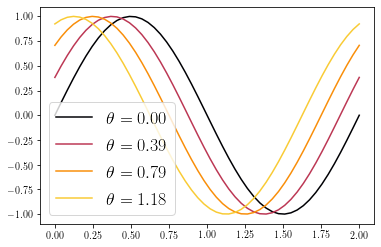

In [8]:
x = np.linspace(0,2,50)
y = [x]*4
theta = [x]*4
for i in range(0,len(y)):
    theta[i] = i*np.pi/8
    y[i] = np.sin(x*np.pi+theta[i])

# Get colors from colormap
cmap = plt.cm.get_cmap('inferno')
colors = [cmap(0),cmap(0.5),cmap(0.75),cmap(0.875)]

# Plot
fig, ax = plt.subplots()
for i in range(0,len(y)):
    plt.plot(x, y[i], color=colors[i], label=r'$\theta = %.2f$'%theta[i])

# Legend
plt.legend(fontsize=18)

plt.show()

---

<br />
&nbsp;

### Error bars

Here we show a basic example. For further details (e.g., asymmetric error bars), see this [reference](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html).

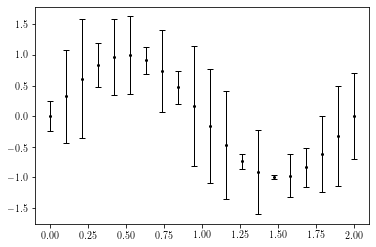

In [9]:
# Data
x = np.linspace(0,2,20)
y = np.sin(x*np.pi)
err = np.random.rand(20)

# Create figure
fig, ax = plt.subplots()

# Plot errorbars
ax.errorbar(x, y, yerr=err, # For horizontal bars, use xerr
            color='k', alpha=1,
            marker='o', markersize=2,
            linewidth=0, elinewidth=1, 
            capsize=3, capthick=1)

plt.show()

---

<br />
&nbsp;

### Plots in superposition

Whenever two objects (lines, markers, etc.) are in superposition, one might want to specify which one should be on top of the other. This can be done with the argument `zorder`. Objects are ordered from top to bottom following decreasing `zorder` values.

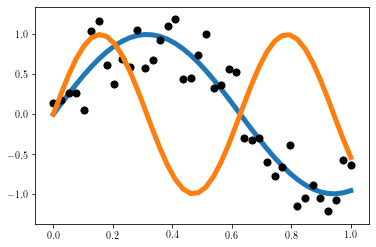

In [10]:
# Data
x = np.linspace(0,1,40)
y1 = np.sin(5*x)
y2 = np.sin(10*x)
y3 = y1+np.random.rand(40)-0.5

# Create figure
fig, ax = plt.subplots()

# Plot y2, y3, and y1 (top to bottom)
plt.plot(x, y1, color='tab:blue', linewidth=5, zorder=-1)
plt.plot(x, y2, color='tab:orange', linewidth=5, zorder=5)
plt.scatter(x, y3, color='k', s=50, zorder=0)

plt.show()

---

<br />
&nbsp;

### LaTeX expressions

To insert LaTeX math expressions in labels, legends, or other text boxes, use `r'$x$'`.

The LaTeX command `\text{}` [does not work in `matplotlib`](https://stackoverflow.com/questions/23824687/text-does-not-work-in-a-matplotlib-label "See Stack Overflow discussion") because it requires the amsmath package, which is not included in `mathtext`, the math rendering engine of `matplotlib`. Instead, use `\mathrm`.

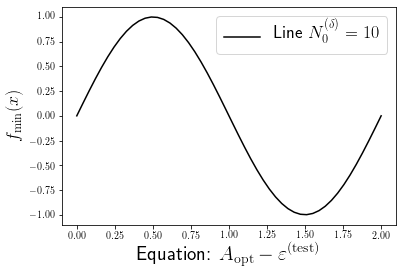

In [11]:
# Remember to import rc and set usetex=True
from matplotlib import rc
rc('text', usetex=True)

# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black', label=r'Line $N_0^{(\delta)}=10$')

# Axes labels
plt.xlabel(r'Equation: $A_\mathrm{opt}-\varepsilon^\mathrm{(test)}$',
           fontsize=20)
plt.ylabel(r'$f_{\min}(x)$', fontsize=18)

# Legend
plt.legend(fontsize=18)

plt.show()

---

<br />
&nbsp;

### Variable value as text (string formatting)

String formatting can be used to include variable values in labels, legends, other text boxes (even in TeX mode), and file names. In short, `'%s'%my_var` converts the value of the scalar variable `my_var` into a string. 

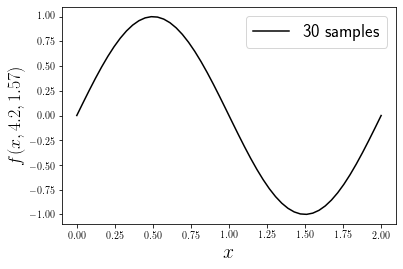

In [12]:
# Remember to import rc and set usetex=True
from matplotlib import rc
rc('text', usetex=True)

# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Variables to print in labels
A = 4.2
B = np.pi/2
C = 30.0

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black', label='%d samples'%C)

# Axes labels
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x,%s,%.2f)$'%(A,B), fontsize=18)

# Legend
plt.legend(fontsize=18)

plt.show()

Note the usage of `%d`/`%s`/`%.2f` to convert the value to an integer/string/float with 2 decimal figures (irrespective of the type of variable).

For further details, see [the Section about string formatting in `cheatsheet_misc.ipynb`](https://nbviewer.jupyter.org/github/AlvaroGI/python_cheatsheet/blob/main/cheatsheet_misc.ipynb#Print-variable-value-(string-formatting) "See cheatsheet_misc.ipynb") and [this reference](https://python-reference.readthedocs.io/en/latest/docs/str/formatting.html).

---

<br />
&nbsp;

### Axes ticks and labels

Basic axes properties, such as limits, scales, and labels, can be modified through `plt` functions. More advanced properties require the use of axis methods.

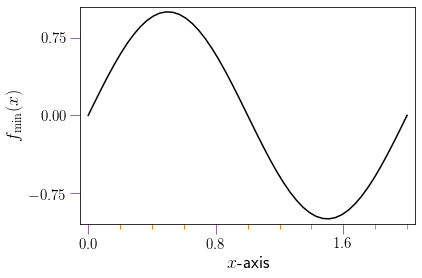

In [13]:
# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Axes limits (can be modified using plt. or ax.)
plt.xlim([-0.05,2.05])
ax.set_ylim([-1.05,1.05])

# Axes scales (can be modified using plt. or ax.)
plt.xscale('linear') # or 'log'
ax.set_yscale('linear') # or 'log'

# Axes labels (can be modified using plt. or ax.)
plt.xlabel(r'$x$-axis', fontsize=18)
ax.set_ylabel(r'$f_{\min}(x)$', fontsize=18)

# Axes labels position
ax.xaxis.set_label_position('bottom') # 'top' or 'bottom'
ax.yaxis.set_label_position('left') # 'left' or 'right'

# Tick labels
ax.set_xticks([0,0.8,1.6])
ax.set_yticks([-0.75,0,0.75])
ax.ticklabel_format(axis='x',style='plain') # or 'sci'
ax.ticklabel_format(axis='y',style='plain') # or 'sci'
ax.tick_params(labelsize=15)

# Tick frequency
minor_intervals = 4 # Number of minor intervals between two major ticks
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(minor_intervals))

# Tick style
ax.tick_params(which='major', # 'major', 'minor', or 'both'
               width=1, length=10, # size of the ticks
               color='tab:purple') # color of the ticks
ax.tick_params(which='minor', # 'major', 'minor', or 'both'
               width=1, length=5, # size of the ticks
               color='tab:orange') # color of the ticks

plt.show()

<br />
&nbsp;

For personalized tick labels in the $x$-axis, use the following (similar for $y$-axis):

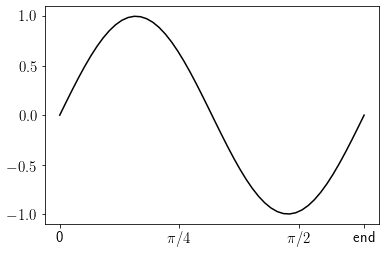

In [14]:
# Data
x = np.linspace(0,2,50)
y = np.sin(x*np.pi)

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Tick labels
ax.tick_params(labelsize=15)
x_formatter = ticker.FixedFormatter(['0',r'$\pi/4$',r'$\pi/2$','end'])
ax.xaxis.set_major_formatter(x_formatter)

# Tick locations
x_locator = ticker.FixedLocator([0,0.785,1.57,2])
ax.xaxis.set_major_locator(x_locator)

plt.show()

<br />
&nbsp;

Sometimes, minor ticks disappear in a log plot. To fix this, use [the following code](https://stackoverflow.com/questions/44078409/matplotlib-semi-log-plot-minor-tick-marks-are-gone-when-range-is-large "Original source"):

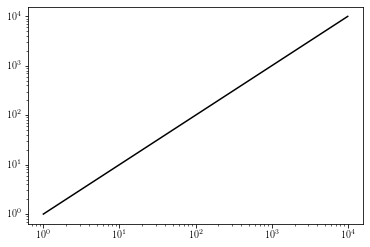

In [15]:
# Data
x = np.linspace(1,10000,50)
y = x

# Create figure
fig, ax = plt.subplots()

# Plot
plt.plot(x, y, color='black')

# Axes scales
ax.set_xscale('log')
ax.set_yscale('log')

# Ensure minor ticks appear
locminx = ticker.LogLocator(base=10.0,
                            subs='all', # Place all ticks
                            numticks=12) # This number should be 12 or larger
ax.xaxis.set_minor_locator(locminx)
ax.xaxis.set_minor_formatter(ticker.NullFormatter()) # No minor labels

locminy = ticker.LogLocator(base=10.0,subs='all',numticks=12)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.show()

<br />
&nbsp;

Note that the tick frequency can be hard to adjust depending on the characteristics of your plot (linear or log, uniform spacing between ticks, etc.). See the [documentation of `plt.ticker`](https://matplotlib.org/3.1.1/api/ticker_api.html) and [these examples](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html) for further details.

Finally, for further questions about ticks, see [this awesome guide on ticks in `matplotlib`](https://e2eml.school/matplotlib_ticks.html "See awesome guide").

---

<br />
&nbsp;
<br />
&nbsp;

## Final example

This final example is a compilation of many of the tools presented above.

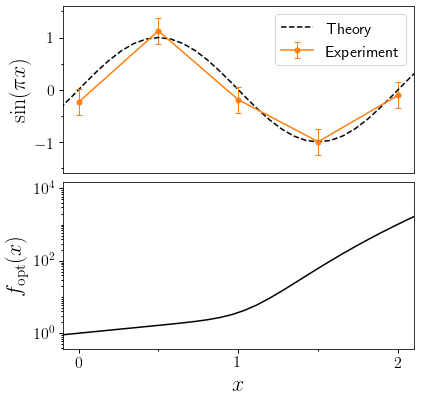

In [16]:
# Data
x = np.linspace(-0.5,2.5,40)
y = np.sin(x*np.pi)
y2 = np.exp(x)+x**10
x_exp = np.linspace(0,2,5)
y_exp = np.sin(x_exp*np.pi)+(np.random.rand(len(x_exp))-0.5)*0.5

# Create figure with size in cm
x_cm = 16
y_cm = 16
fig = plt.figure(figsize=(x_cm/2.54, y_cm/2.54))
grid = fig.add_gridspec(nrows=2, ncols=1, hspace=0.05)
ax = [None] * 2
ax[0] = fig.add_subplot(grid[0, 0])
ax[1] = fig.add_subplot(grid[1, 0])

# Plot
ax[0].plot(x, y, color='black', linestyle='--', label='Theory')
ax[0].errorbar(x_exp, y_exp, yerr=0.25,
               color='tab:orange',
               marker='o', markersize = 5,
               markerfacecolor='tab:orange', 
               markeredgecolor='tab:orange',
               elinewidth=1, 
               capsize=3, capthick=1,
               label='Experiment')
ax[1].plot(x, y2, color='black')

# Axes limits
ax[0].set_xlim([-0.1,2.1])
ax[0].set_ylim([-1.6,1.6])
ax[1].set_xlim([-0.1,2.1])

# Axes scale
ax[1].set_yscale('log')

# Axes labels
ax[0].set_ylabel(r'$\sin(\pi x)$', fontsize=22)
ax[1].set_xlabel(r'$x$', fontsize=22)
ax[1].set_ylabel(r'$f_{\mathrm{opt}}(x)$', fontsize=22)

# Axes ticks and tick labels
ax[0].set_xticks([])
ax[0].set_yticks([-1,0,1])
ax[0].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax[0].tick_params(labelsize=16)
ax[0].tick_params(which='major',
                   width=1, length=4)
ax[0].tick_params(which='minor',
               width=1, length=2)
ax[1].set_xticks([0,1,2])
ax[1].set_yticks([1,100,10000])
ax[1].tick_params(labelsize=16)
minorx_intervals = 2
ax[1].xaxis.set_minor_locator(ticker.AutoMinorLocator(minorx_intervals))
locmin = ticker.LogLocator(base=10.0, subs='all', numticks=12)
ax[1].yaxis.set_minor_locator(locmin)
ax[1].yaxis.set_minor_formatter(ticker.NullFormatter())
ax[1].tick_params(which='major',
                   width=1, length=4)
ax[1].tick_params(which='minor',
               width=1, length=2)

# Legend
ax[0].legend(fontsize=16)

# Show or save
save = False
if save:
    filename = 'figs_directory/example_fig'
    plt.savefig(filename,dpi=300,bbox_inches='tight')
else:
    plt.show()

---

<br />
&nbsp;
<br />
&nbsp;

## Retrieve data from plots

It is common to use other people's data in our own plots (e.g., when a theorist takes measurements from an experimentalist and prepares a plot to compare theoretical versus experimental trends). In some cases, the raw data is not available and the only resource is plotted data. Instead of manually estimating the value of each point, a better practice is to employ a data retrieval software such as [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/). In short, this tool works as follows:
 1. Upload the source plot as an image.
 2. Calibrate the axes.
 3. Select the data points of interest.
 4. Export your dataset.

<br />
&nbsp;
<br />
&nbsp;
<br />
&nbsp;
<br />
&nbsp;

<span style="color:blue">Álvaro Gómez Iñesta - Wehner's Group @ QuTech, TU Delft. February 2021.</span>